### 1. Iz Annotations/train.json filtrirati samo ona pitanja koja ne zahtevaju prepoznavanje teksta (izlazi van domena rešenja)
### 2. Podeliti filtrirani skup na train i test deo (data/train.json i data/test.json)

### Napomena 1 - Annotations/val.json i Annotations/test.json necemo koristiti ni za obucavanje ni za evaluaciju zato sto nemamo informacije o tome da li zahtevaju prepoznavanje teksta
### Napomena 2 - Ravnomerna podela na osnovu answer_type (number, yes/no, other, unanswerable)

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [100]:
ocr = pd.read_csv('data/ocr.csv')
ocr.head()

,IMG,QSN,TXT,OBJ,COL,CNT,OTH
0,VizWiz_train_00000000.jpg,What's the name of this product?,4,3,0,0,0
1,VizWiz_train_00000001.jpg,Can you tell me what is in this can please?,2,5,1,1,0
2,VizWiz_train_00000002.jpg,Is this enchilada sauce or is this tomatoes? ...,4,3,1,0,0
3,VizWiz_train_00000003.jpg,What is the captcha on this screenshot?,4,2,1,1,0
4,VizWiz_train_00000004.jpg,What is this item?,3,5,1,0,0


In [101]:
ocr.TXT.describe()

count    14239.000000
mean         2.107732
std          1.819784
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: TXT, dtype: float64

In [102]:
ocr_filtered = ocr[ocr.TXT <= 1]
ocr_filtered.head()

,IMG,QSN,TXT,OBJ,COL,CNT,OTH
5,VizWiz_train_00000005.jpg,What's this?,1,5,1,0,0
8,VizWiz_train_00000008.jpg,What color do these look?,1,3,4,0,0
9,VizWiz_train_00000009.jpg,Surface look clean? Thank you.,0,5,1,0,0
10,VizWiz_train_00000010.jpg,Is this.,1,5,2,0,0
11,VizWiz_train_00000012.jpg,what is this?,0,5,2,0,0


In [103]:
ocr_filtered.TXT.describe()

count    6241.000000
mean        0.273514
std         0.445798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TXT, dtype: float64

In [104]:
data = pd.read_json('Annotations/train.json')

In [105]:
data_filtered = data[data.image.isin(ocr_filtered.IMG)]
data_filtered.head()

,image,question,answers,answer_type,answerable
5,VizWiz_train_00000005.jpg,What's this?,"[{'answer_confidence': 'yes', 'answer': 'boots...",other,1
8,VizWiz_train_00000008.jpg,What color do these look?,"[{'answer_confidence': 'yes', 'answer': 'orang...",other,1
9,VizWiz_train_00000009.jpg,Surface look clean? Thank you.,"[{'answer_confidence': 'yes', 'answer': 'yes'}...",yes/no,1
10,VizWiz_train_00000010.jpg,Is this.,"[{'answer_confidence': 'maybe', 'answer': 'and...",other,1
12,VizWiz_train_00000012.jpg,what is this?,"[{'answer_confidence': 'yes', 'answer': 'remot...",other,1


In [106]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238 entries, 5 to 19924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        6238 non-null   object
 1   question     6238 non-null   object
 2   answers      6238 non-null   object
 3   answer_type  6238 non-null   object
 4   answerable   6238 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 292.4+ KB


### Zašto ocr_filtered ima 6241, a data_filtered 6238 elementara? nzm

In [107]:
data_filtered.answer_type.describe()

count      6238
unique        4
top       other
freq       5678
Name: answer_type, dtype: object

In [108]:
data_filtered.answer_type.unique()

array(['other', 'yes/no', 'number', 'unanswerable'], dtype=object)

In [109]:
train, test = train_test_split(data_filtered, train_size=0.9, stratify=data_filtered.answer_type)
train.to_json('data/train.json')
test.to_json('data/test.json')

In [110]:
train = pd.read_json('data/train.json')
train.head()

,image,question,answers,answer_type,answerable
13750,VizWiz_train_00013750.jpg,Can you tell what color this dress is?,"[{'answer_confidence': 'yes', 'answer': 'blue ...",other,1
14965,VizWiz_train_00014965.jpg,What color is this?,"[{'answer_confidence': 'yes', 'answer': 'blue'...",other,1
1130,VizWiz_train_00001130.jpg,What is this item?,"[{'answer_confidence': 'yes', 'answer': 'cell ...",other,1
12246,VizWiz_train_00012246.jpg,What is this?,"[{'answer_confidence': 'yes', 'answer': 'pictu...",other,1
12592,VizWiz_train_00012592.jpg,What color is this cat?,"[{'answer_confidence': 'yes', 'answer': 'brown...",other,1


In [111]:
test = pd.read_json('data/test.json')
test.head()

,image,question,answers,answer_type,answerable
9485,VizWiz_train_00009485.jpg,What color is this sweater please?,"[{'answer_confidence': 'yes', 'answer': 'beige...",other,1
4991,VizWiz_train_00004991.jpg,What do you see?,"[{'answer_confidence': 'yes', 'answer': 'ceili...",other,1
3626,VizWiz_train_00003626.jpg,Does this outfit match?,"[{'answer_confidence': 'maybe', 'answer': 'no'...",yes/no,1
5530,VizWiz_train_00005530.jpg,What kind of car is this?,"[{'answer_confidence': 'yes', 'answer': 'ford'...",other,1
13032,VizWiz_train_00013032.jpg,What is this?,"[{'answer_confidence': 'yes', 'answer': 'unans...",other,1


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5614 entries, 13750 to 12060
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        5614 non-null   object
 1   question     5614 non-null   object
 2   answers      5614 non-null   object
 3   answer_type  5614 non-null   object
 4   answerable   5614 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 263.2+ KB


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 9485 to 6834
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        624 non-null    object
 1   question     624 non-null    object
 2   answers      624 non-null    object
 3   answer_type  624 non-null    object
 4   answerable   624 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 29.2+ KB


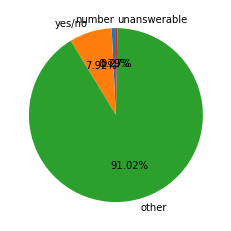

In [114]:
num = data_filtered[data_filtered.answer_type == 'number'].count()[0]
yn = data_filtered[data_filtered.answer_type == 'yes/no'].count()[0]
other = data_filtered[data_filtered.answer_type == 'other'].count()[0]
u = data_filtered[data_filtered.answer_type == 'unanswerable'].count()[0]
ans_type_count = np.array([num, yn, other, u])
labels = ["number", "yes/no", "other", "unanswerable"]

plt.pie(ans_type_count, labels=labels, startangle=90, autopct='%1.2f%%')
plt.show()

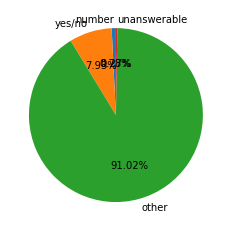

In [115]:
num = train[train.answer_type == 'number'].count()[0]
yn = train[train.answer_type == 'yes/no'].count()[0]
other = train[train.answer_type == 'other'].count()[0]
u = train[train.answer_type == 'unanswerable'].count()[0]
ans_type_count = np.array([num, yn, other, u])
labels = ["number", "yes/no", "other", "unanswerable"]

plt.pie(ans_type_count, labels=labels, startangle=90, autopct='%1.2f%%')
plt.show()

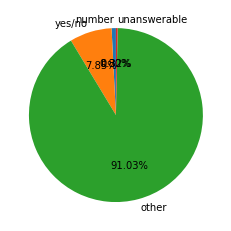

In [116]:
num = test[test.answer_type == 'number'].count()[0]
yn = test[test.answer_type == 'yes/no'].count()[0]
other = test[test.answer_type == 'other'].count()[0]
u = test[test.answer_type == 'unanswerable'].count()[0]
ans_type_count = np.array([num, yn, other, u])
labels = ["number", "yes/no", "other", "unanswerable"]

plt.pie(ans_type_count, labels=labels, startangle=90, autopct='%1.2f%%')
plt.show()

### jako malo unanswerable => ne moramo ih izbacivati